In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()

#### s670-2020-01-21.Rmd

In [3]:
singer = pd.read_excel("data/singer.xlsx")
singer.drop(labels="Unnamed: 0", inplace=True, axis=1)
tenors = singer[singer["voice.part"].isin(["Tenor 1", "Tenor 2"])]

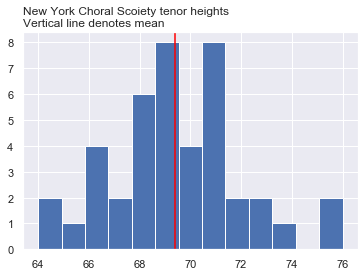

In [4]:
plt.hist("height", bins=13, data=tenors)
plt.title(
    "New York Choral Scoiety tenor heights\nVertical line denotes mean", loc="left"
)
plt.axvline(np.mean(tenors.height), color="red")

#### Aggregate per category

In [5]:
# as_index and column renaming is must
aggregates = singer.groupby("voice.part", as_index=False).agg(
    {"height": ["mean", "median"]}
)
aggregates.columns = ["_".join(x).strip("_") for x in aggregates.columns.ravel()]
aggregates

,voice.part,height_mean,height_median
0,Alto 1,64.885714,65
1,Alto 2,66.037037,66
2,Bass 1,70.717949,71
3,Bass 2,71.384615,72
4,Soprano 1,64.250000,65
5,Soprano 2,63.966667,64
6,Tenor 1,68.904762,68
7,Tenor 2,69.904762,69


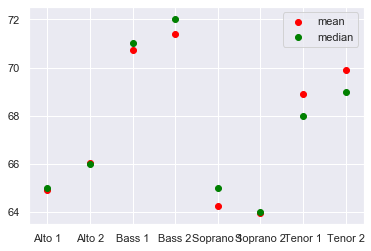

In [6]:
plt.scatter("voice.part", "height_mean", data=aggregates, c="red", label="mean")
plt.scatter("voice.part", "height_median", data=aggregates, c="green", label="median")
plt.legend()

#### Alternate way Long Form

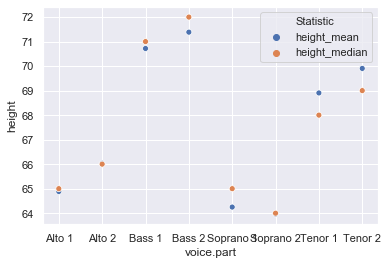

In [7]:
aggergates_long = aggregates.melt(
    id_vars="voice.part",
    value_vars=["height_mean", "height_median"],
    value_name="height",
    var_name="Statistic",
)
sns.scatterplot(x="voice.part", y="height", hue="Statistic", data=aggergates_long)

In [23]:
aggergates_long.head()

,voice.part,Statistic,height
0,Alto 1,height_mean,64.885714
1,Alto 2,height_mean,66.037037
2,Bass 1,height_mean,70.717949
3,Bass 2,height_mean,71.384615
4,Soprano 1,height_mean,64.250000


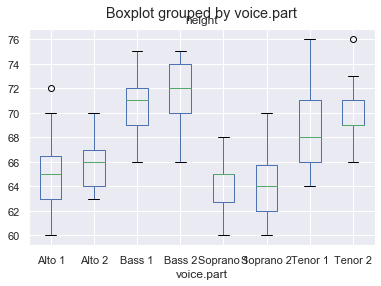

In [8]:
singer.boxplot(by="voice.part", column="height")

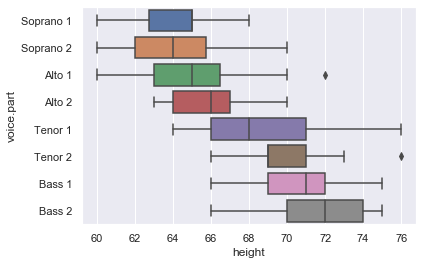

In [9]:
sns.boxplot(y="voice.part", x="height", data=singer, orient="h")

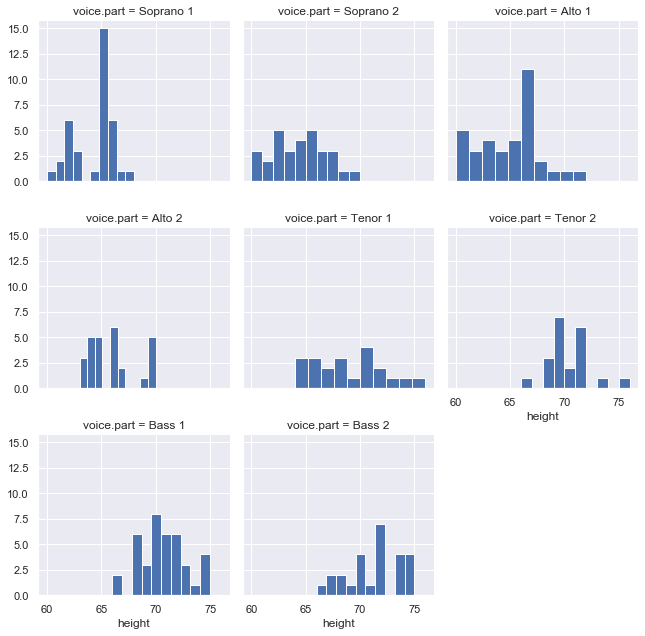

In [10]:
g = sns.FacetGrid(data=singer, col="voice.part", col_wrap=3)
g.map(plt.hist, "height")

#### alternate using catplot: only limited kind options

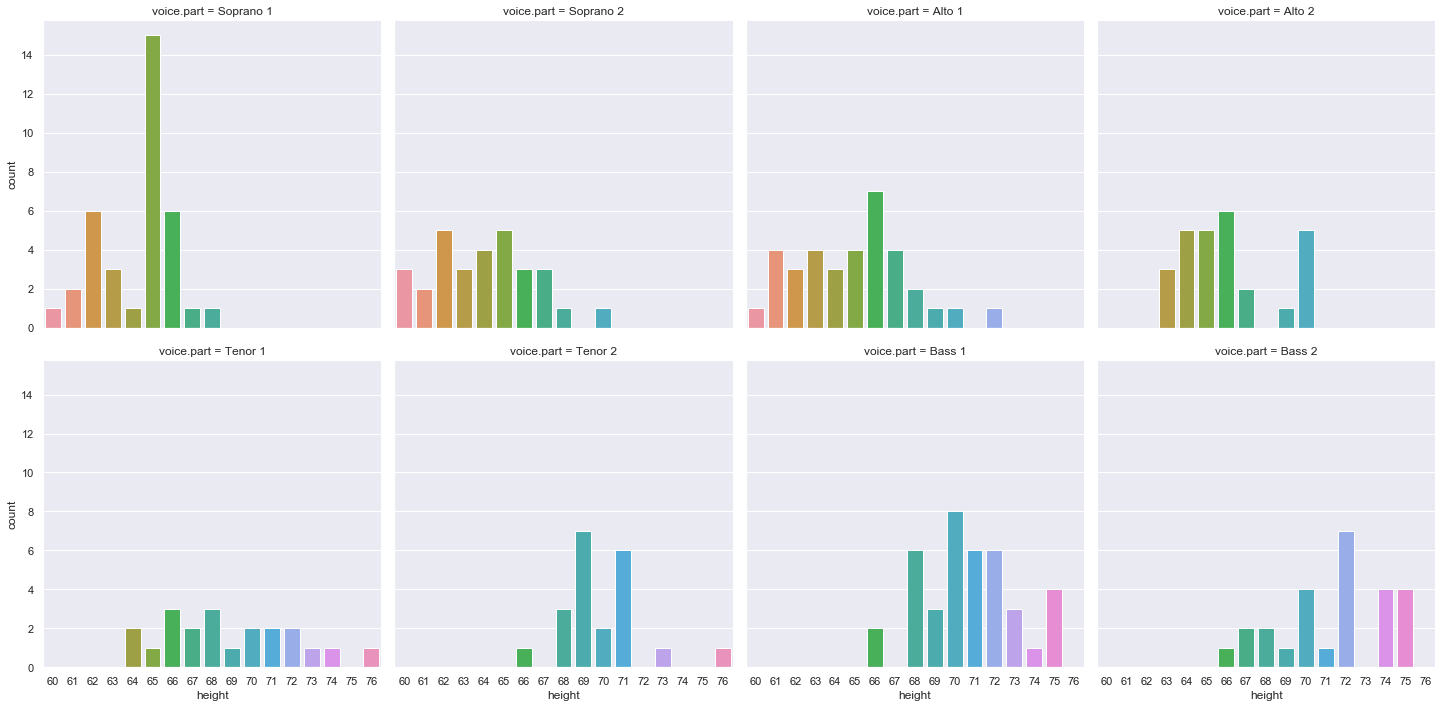

In [11]:
sns.catplot(x="height", col="voice.part", data=singer, kind="count", col_wrap=4)

''

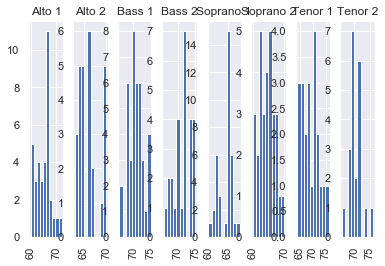

In [12]:
singer.hist(by="voice.part", column="height", layout=(1, 8))
;

In [13]:
# Not Working
# singer.groupby("voice.part", as_index=False).hist(layout=(2, 4));
;

''

#### Adding new column based on some other column value

In [14]:
def set_value(curr_row_value, event_dictionary):
    #     print(event_dictionary, curr_row_value)
    return event_dictionary[curr_row_value]


# Create the dictionary
event_dictionary = {
    "Soprano 1": "Female",
    "Soprano 2": "Female",
    "Alto 1": "Female",
    "Alto 2": "Female",
    "Tenor 1": "Male",
    "Tenor 2": "Male",
    "Bass 1": "Male",
    "Bass 2": "Male",
}

# .apply will be called for every row and set_value function will be applied
singer["Sex"] = singer["voice.part"].apply(set_value, args=(event_dictionary,))

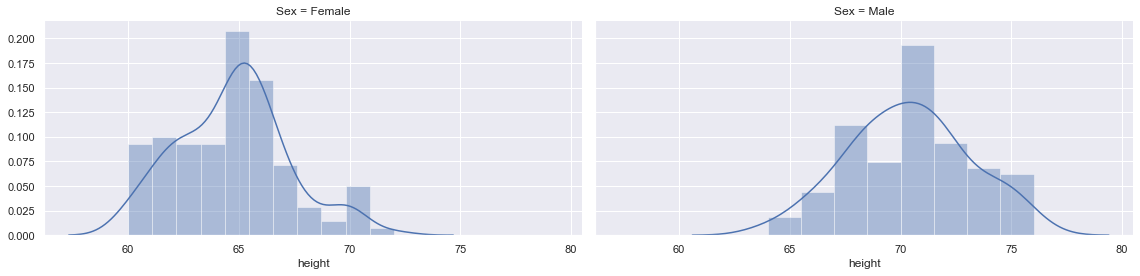

In [15]:
g = sns.FacetGrid(data=singer, col="Sex", height=4, aspect=2)
g.map(sns.distplot, "height")

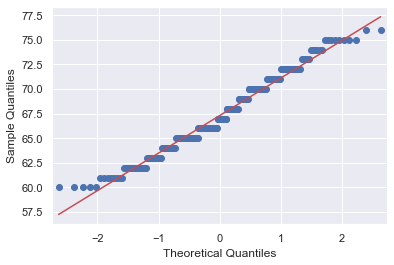

In [16]:
sm.qqplot(singer.height, line="s")
# plt.show() is necessary otherwise two plots are generated: sample vs theoretical and theoretical vs sample
plt.show()

## Check how to do it

In [17]:
# log and without log

# qq(sex ~ height, data = singer)
# qq(sex ~ log(height), data = singer)

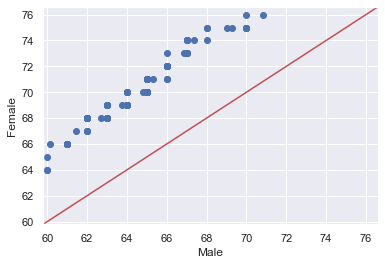

In [18]:
from statsmodels.graphics.gofplots import qqplot_2samples

pp_x = sm.ProbPlot(singer[singer.Sex == "Male"].height)
pp_y = sm.ProbPlot(singer[singer.Sex == "Female"].height)
qqplot_2samples(pp_x, pp_y, "Male", "Female", line="45")
plt.show()

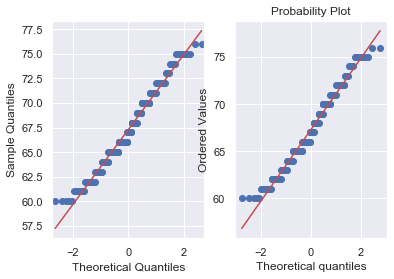

In [19]:
from scipy import stats
fig, ax = plt.subplots(1, 2)
sm.qqplot(singer.height, line="s", ax=ax[0])
stats.probplot(singer.height, fit=False, plot=ax[1])
plt.show()

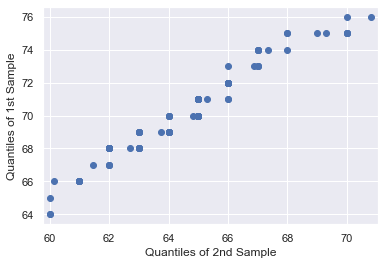

In [20]:
_, xr = stats.probplot(singer[singer.Sex == "Male"].height, fit=False)
_, xy = stats.probplot(singer[singer.Sex == "Female"].height, fit=False)
qqplot_2samples(xr, xy)
plt.show()

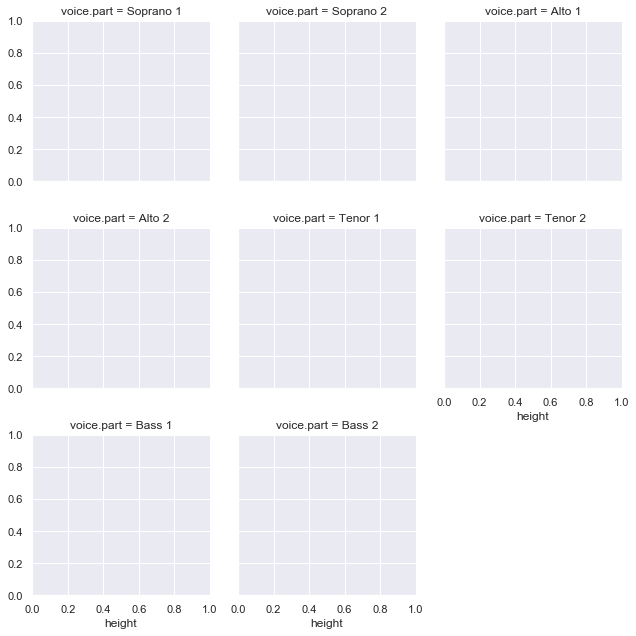

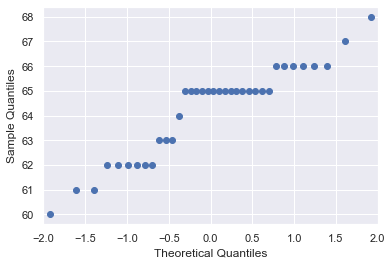

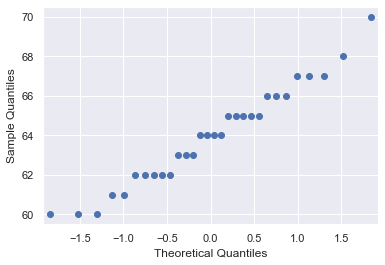

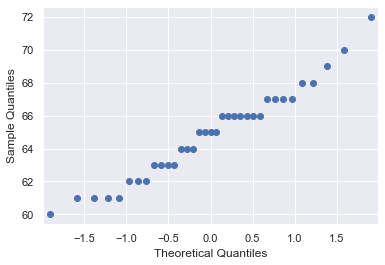

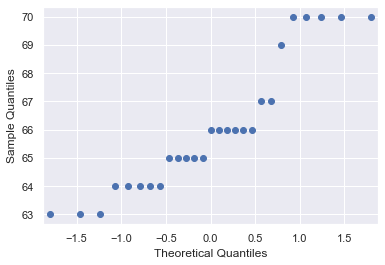

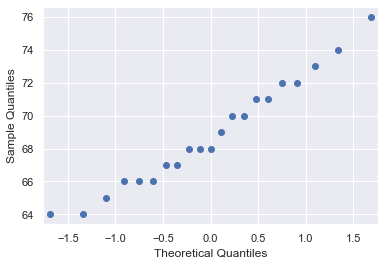

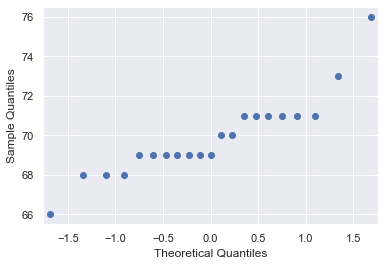

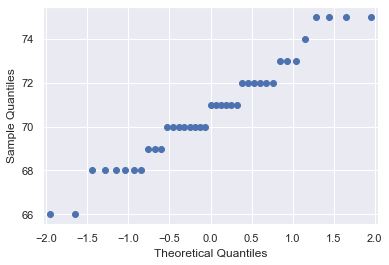

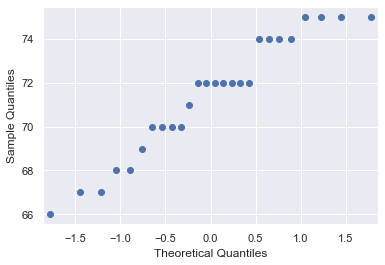

In [21]:
g = sns.FacetGrid(data=singer, col="voice.part", col_wrap=3)
g.map(sm.qqplot, "height")
plt.show()